In [5]:
import numpy as np
import MEArec as mr
import MEAutility as MEA
from probeinterface import Probe, ProbeGroup
from probeinterface.plotting import plot_probe, plot_probe_group
from probeinterface.plotting import plot_probe 
from probeinterface import generate_multi_columns_probe
from probeinterface import generate_dummy_probe
from probeinterface import write_probeinterface, read_probeinterface
from probeinterface import write_prb, read_prb
import spikeinterface.extractors as se

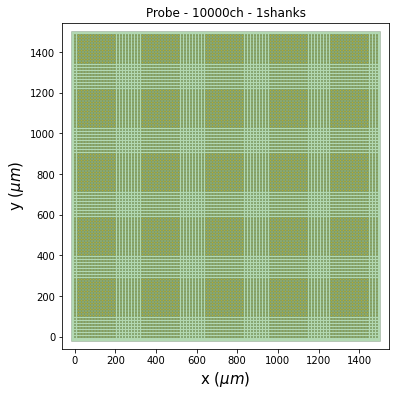

,x,y,contact_shapes,width,shank_ids,contact_ids
0,0.0,0.0,square,8.0,,
1,0.0,15.0,square,8.0,,
2,0.0,30.0,square,8.0,,
3,0.0,45.0,square,8.0,,
4,0.0,60.0,square,8.0,,
...,...,...,...,...,...,...
9995,1485.0,1425.0,square,8.0,,
9996,1485.0,1440.0,square,8.0,,
9997,1485.0,1455.0,square,8.0,,
9998,1485.0,1470.0,square,8.0,,


In [6]:
#build 100*100 MEA by probeinterface
xpitch = 15
ypitch = 15
num_columns=100
num_contact_per_column=100
SqMEA100 = generate_multi_columns_probe(num_columns=num_columns,
                                            num_contact_per_column=num_contact_per_column,
                                            xpitch=xpitch, ypitch=ypitch,
                                            contact_shapes='square', contact_shape_params={'width': 8})
SqMEA100.create_auto_shape('rect')
plt.rcParams['figure.figsize'] = [8,6]
plot_probe(SqMEA100)

plt.show()
df = SqMEA100.to_dataframe()
df

In [7]:
MEA.remove_mea('SqMEA-100-15um.yaml')

Available MEA: 
 ['SqMEA-7-20', 'tetrode', 'Neuroseeker-128', 'tetrode-mea-l', 'SqMEA-100-15um', 'Neuropixels-24', 'tetrode-mea-d', 'Neuronexus-32', 'Neuropixels-64', 'Neuropixels-128', 'SqMEA-6-25', 'Neuropixels-384', 'SqMEA-10-15', 'SqMEA-15-10', 'tetrode-mea-s', 'monotrode', 'SqMEA-5-30']


In [8]:
# build 100*100 MEA by meautility
import yaml, os

sqmea100 ={'dim': 100,
 'electrode_name': 'SqMEA-100-15um',
 'pitch': 15,
 'shape': 'square',
 'size': 5,
 'sortlist': None,
 'type': 'mea'}

with open('SqMEA-100-15um.yaml', 'w') as f:
    yaml.dump(sqmea100, f)

yaml_files = [f for f in os.listdir('.') if f.endswith('.yaml')]
print(yaml_files)


['SqMEA100.yaml', 'SqMEA-100-15um.yaml', 'user.yaml']


In [9]:
MEA.add_mea('SqMEA-100-15um.yaml')

['Neuronexus-32', 'Neuropixels-128', 'Neuropixels-24', 'Neuropixels-384', 'Neuropixels-64', 'Neuroseeker-128', 'SqMEA-10-15', 'SqMEA-100-15um', 'SqMEA-15-10', 'SqMEA-5-30', 'SqMEA-6-25', 'SqMEA-7-20', 'monotrode', 'tetrode', 'tetrode-mea-d', 'tetrode-mea-l', 'tetrode-mea-s']


In [10]:
cell_models_folder = mr.get_default_cell_models_folder()
templates_params = mr.get_default_templates_params()
templates_params

{'sim_time': 1,
 'target_spikes': [3, 50],
 'cut_out': [2, 5],
 'dt': 0.03125,
 'delay': 10,
 'weights': [0.25, 1.75],
 'rot': 'physrot',
 'probe': 'Neuronexus-32',
 'ncontacts': 10,
 'overhang': 30,
 'offset': 0,
 'xlim': [10, 80],
 'ylim': None,
 'zlim': None,
 'min_amp': 30,
 'n': 50,
 'seed': None,
 'drifting': False,
 'max_drift': 100,
 'min_drift': 30,
 'drift_steps': 30,
 'drift_xlim': [-10, 10],
 'drift_ylim': [-10, 10],
 'drift_zlim': [30, 80],
 'check_for_drift_amp': False,
 'drift_within_bounds': False}

In [11]:
templates_params['probe'] = 'SqMEA-100-15um'
templates_params['n'] = 100
templates_params['seed'] = 123
templates_params['sim_time'] = 60 

In [10]:
# tempgen = mr.gen_templates(cell_models_folder=cell_models_folder, params=templates_params, parallel=True, n_jobs=20, delete_tmp=True, verbose=True)
# mr.save_template_generator(tempgen, 'data/MEA100*100/tempgen.h5')

Running with 25 jobs


/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_DBC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_DBC_bAC217_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bAC217_L5_DBC_4765d943f4 exist already
Cell L5_DBC_bAC217_1 extracellular spikes to be simulated
Cell: L5_DBC_bAC217_1 Progress: [1/100]
Cell: L5_DBC_bAC217_1 Progress: [2/100]
Cell: L5_DBC_bAC217_1 Progress: [3/100]
Cell: L5_DBC_bAC217_1 Progress: [4/100]
Cell: L5_DBC_bAC217_1 Progress: [5/100]
Cell: L5_DBC_bAC217_1 Progress: [6/100]
Cell: L5_DBC_bAC217_1 Progress: [7/100]
Cell: L5_DBC_bAC217_1 Progress: [8/100]
Cell: L5_DBC_bAC217_1 Progress: [9/100]
Cell: L5_DBC_bAC217_1 Progress: [10/100]
Cell: L5_DBC_bAC217_1 Progress: [11/100]
Cell: L5_DBC_bAC217_1 Progress: [12/100]
Cell: L5_DBC_bAC217_1 Progress: [13/100]
Cell: L5_DBC_bAC217_1 Progr

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Starting 4


 /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_DBC_bAC217_1 4/13


Exiting 4
Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_TTPC1_cADpyr232_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_TTPC1_cADpyr232_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Cell L5_TTPC1_cADpyr232_1 extracellular spikes to be simulated
Cell: L5_TTPC1_cADpyr232_1 Progress: [1/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [2/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [3/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [4/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [5/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [6/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [7/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [8/100]
Cell: L5_TTPC1_cADpyr232_1 Progress: [9/100]
Cell: L5_TTPC1_cADpyr232_1 Pr

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated

Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_TTPC2_cADpyr232_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_TTPC2_cADpyr232_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template cADpyr232_L5_TTPC2_8052133265 exist already
Cell L5_TTPC2_cADpyr232_1 extracellular spikes to be simulated
Cell: L5_TTPC2_cADpyr232_1 Progress: [1/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [2/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [3/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [4/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [5/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [6/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [7/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [8/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [9/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [10/100]
Cell: L5_TTPC2_cADpyr232_1 Progress: [11/100]
Cell: L5_TTPC2_cADpyr232_1 Progres

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated

Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_LBC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_LBC_bAC217_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bAC217_L5_LBC_c2cff91741 exist already
Cell L5_LBC_bAC217_1 extracellular spikes to be simulated
Cell: L5_LBC_bAC217_1 Progress: [1/100]
Cell: L5_LBC_bAC217_1 Progress: [2/100]
Cell: L5_LBC_bAC217_1 Progress: [3/100]
Cell: L5_LBC_bAC217_1 Progress: [4/100]
Cell: L5_LBC_bAC217_1 Progress: [5/100]
Cell: L5_LBC_bAC217_1 Progress: [6/100]
Cell: L5_LBC_bAC217_1 Progress: [7/100]
Cell: L5_LBC_bAC217_1 Progress: [8/100]
Cell: L5_LBC_bAC217_1 Progress: [9/100]
Cell: L5_LBC_bAC217_1 Progress: [10/100]
Cell: L5_LBC_bAC217_1 Progress: [11/100]
Cell: L5_LBC_bAC217_1 Progress: [12/100]
Cell: L5_LBC_bAC217_1 Progress: [13/100]
Cell: L5_LBC_bAC217_1 Progr

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_MC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_MC_bAC217_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bAC217_L5_MC_cc2a170ef6 exist already
Cell L5_MC_bAC217_1 extracellular spikes to be simulated
Cell: L5_MC_bAC217_1 Progress: [1/100]
Cell: L5_MC_bAC217_1 Progress: [2/100]
Cell: L5_MC_bAC217_1 Progress: [3/100]
Cell: L5_MC_bAC217_1 Progress: [4/100]
Cell: L5_MC_bAC217_1 Progress: [5/100]
Cell: L5_MC_bAC217_1 Progress: [6/100]
Cell: L5_MC_bAC217_1 Progress: [7/100]
Cell: L5_MC_bAC217_1 Progress: [8/100]
Cell: L5_MC_bAC217_1 Progress: [9/100]
Cell: L5_MC_bAC217_1 Progress: [10/100]
Cell: L5_MC_bAC217_1 Progress: [11/100]
Cell: L5_MC_bAC217_1 Progress: [12/100]
Cell: L5_MC_bAC217_1 Progress: [13/100]
Cell: L5_MC_bAC217_1 Progress: [14/100]
Cell

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_BTC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_BTC_bAC217_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bAC217_L5_BTC_160272643a exist already
Cell L5_BTC_bAC217_1 extracellular spikes to be simulated
Cell: L5_BTC_bAC217_1 Progress: [1/100]
Cell: L5_BTC_bAC217_1 Progress: [2/100]
Cell: L5_BTC_bAC217_1 Progress: [3/100]
Cell: L5_BTC_bAC217_1 Progress: [4/100]
Cell: L5_BTC_bAC217_1 Progress: [5/100]
Cell: L5_BTC_bAC217_1 Progress: [6/100]
Cell: L5_BTC_bAC217_1 Progress: [7/100]
Cell: L5_BTC_bAC217_1 Progress: [8/100]
Cell: L5_BTC_bAC217_1 Progress: [9/100]
Cell: L5_BTC_bAC217_1 Progress: [10/100]
Cell: L5_BTC_bAC217_1 Progress: [11/100]
Cell: L5_BTC_bAC217_1 Progress: [12/100]
Cell: L5_BTC_bAC217_1 Progress: [13/100]
Cell: L5_BTC_bAC217_1 Progr

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_NBC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_NBC_bAC217_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bAC217_L5_NBC_2db880c523 exist already
Cell L5_NBC_bAC217_1 extracellular spikes to be simulated
Cell: L5_NBC_bAC217_1 Progress: [1/100]
Cell: L5_NBC_bAC217_1 Progress: [2/100]
Cell: L5_NBC_bAC217_1 Progress: [3/100]
Cell: L5_NBC_bAC217_1 Progress: [4/100]
Cell: L5_NBC_bAC217_1 Progress: [5/100]
Cell: L5_NBC_bAC217_1 Progress: [6/100]
Cell: L5_NBC_bAC217_1 Progress: [7/100]
Cell: L5_NBC_bAC217_1 Progress: [8/100]
Cell: L5_NBC_bAC217_1 Progress: [9/100]
Cell: L5_NBC_bAC217_1 Progress: [10/100]
Cell: L5_NBC_bAC217_1 Progress: [11/100]
Cell: L5_NBC_bAC217_1 Progress: [12/100]
Cell: L5_NBC_bAC217_1 Progress: [13/100]
Cell: L5_NBC_bAC217_1 Progr

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_UTPC_cADpyr232_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_UTPC_cADpyr232_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template cADpyr232_L5_UTPC_5e3840b51e exist already
Cell L5_UTPC_cADpyr232_1 extracellular spikes to be simulated
Cell: L5_UTPC_cADpyr232_1 Progress: [1/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [2/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [3/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [4/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [5/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [6/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [7/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [8/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [9/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [10/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [11/100]
Cell: L5_UTPC_cADpyr232_1 Progress: [12/100]
Cell

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_NGC_bNAC219_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_NGC_bNAC219_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bNAC219_L5_NGC_6186b7e85e exist already
Cell L5_NGC_bNAC219_1 extracellular spikes to be simulated
Cell: L5_NGC_bNAC219_1 Progress: [1/100]
Cell: L5_NGC_bNAC219_1 Progress: [2/100]
Cell: L5_NGC_bNAC219_1 Progress: [3/100]
Cell: L5_NGC_bNAC219_1 Progress: [4/100]
Cell: L5_NGC_bNAC219_1 Progress: [5/100]
Cell: L5_NGC_bNAC219_1 Progress: [6/100]
Cell: L5_NGC_bNAC219_1 Progress: [7/100]
Cell: L5_NGC_bNAC219_1 Progress: [8/100]
Cell: L5_NGC_bNAC219_1 Progress: [9/100]
Cell: L5_NGC_bNAC219_1 Progress: [10/100]
Cell: L5_NGC_bNAC219_1 Progress: [11/100]
Cell: L5_NGC_bNAC219_1 Progress: [12/100]
Cell: L5_NGC_bNAC219_1 Progress: [13/100]
Cell: L5_N

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_SBC_bNAC219_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_SBC_bNAC219_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bNAC219_L5_SBC_77ab259b7f exist already
Cell L5_SBC_bNAC219_1 extracellular spikes to be simulated
Cell: L5_SBC_bNAC219_1 Progress: [1/100]
Cell: L5_SBC_bNAC219_1 Progress: [2/100]
Cell: L5_SBC_bNAC219_1 Progress: [3/100]
Cell: L5_SBC_bNAC219_1 Progress: [4/100]
Cell: L5_SBC_bNAC219_1 Progress: [5/100]
Cell: L5_SBC_bNAC219_1 Progress: [6/100]
Cell: L5_SBC_bNAC219_1 Progress: [7/100]
Cell: L5_SBC_bNAC219_1 Progress: [8/100]
Cell: L5_SBC_bNAC219_1 Progress: [9/100]
Cell: L5_SBC_bNAC219_1 Progress: [10/100]
Cell: L5_SBC_bNAC219_1 Progress: [11/100]
Cell: L5_SBC_bNAC219_1 Progress: [12/100]
Cell: L5_SBC_bNAC219_1 Progress: [13/100]
Cell: L5_S

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(yaml.__version__) >= StrictVersion('5.0.0'):
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/MEArec/simulate_cells.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(LFPy.__version__) < StrictVersion('2.2'):


Intracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_BP_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /home/eazizi/.config/mearec/1.7.2/cell_models/bbp/L5_BP_bAC217_1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template bAC217_L5_BP_d0cc8d7615 exist already
Cell L5_BP_bAC217_1 extracellular spikes to be simulated
Cell: L5_BP_bAC217_1 Progress: [1/100]
Cell: L5_BP_bAC217_1 Progress: [2/100]
Cell: L5_BP_bAC217_1 Progress: [3/100]
Cell: L5_BP_bAC217_1 Progress: [4/100]
Cell: L5_BP_bAC217_1 Progress: [5/100]
Cell: L5_BP_bAC217_1 Progress: [6/100]
Cell: L5_BP_bAC217_1 Progress: [7/100]
Cell: L5_BP_bAC217_1 Progress: [8/100]
Cell: L5_BP_bAC217_1 Progress: [9/100]
Cell: L5_BP_bAC217_1 Progress: [10/100]
Cell: L5_BP_bAC217_1 Progress: [11/100]
Cell: L5_BP_bAC217_1 Progress: [12/100]
Cell: L5_BP_bAC217_1 Progress: [13/100]
Cell: L5_BP_bAC217_1 Progress: [14/100]
Cell

In [12]:
mr.get_default_recordings_params()

{'spiketrains': {'n_exc': 7,
  'n_inh': 3,
  'f_exc': 5,
  'f_inh': 15,
  'st_exc': 1,
  'st_inh': 3,
  'min_rate': 0.5,
  'ref_per': 2,
  'process': 'poisson',
  'gamma_shape': 2,
  't_start': 0,
  'duration': 10},
 'cell_types': {'excitatory': ['PC', 'SS', 'SP'],
  'inhibitory': ['AC', 'BP', 'BC', 'BTC', 'ChC', 'DBC', 'MC', 'NGC']},
 'seeds': {'spiketrains': None,
  'templates': None,
  'convolution': None,
  'noise': None},
 'templates': {'min_dist': 25,
  'min_amp': 50,
  'max_amp': 300,
  'n_overlap_pairs': None,
  'xlim': None,
  'ylim': None,
  'zlim': None,
  'overlap_threshold': 0.9,
  'n_jitters': 10,
  'upsample': 8,
  'pad_len': [3, 3]},
 'recordings': {'fs': None,
  'dtype': 'float32',
  'overlap': False,
  'extract_waveforms': False,
  'sync_rate': None,
  'sync_jitt': 1,
  'chunk_duration': 0,
  'modulation': 'electrode',
  'sdrand': 0.05,
  'bursting': False,
  'bursting_units': None,
  'exp_decay': 0.2,
  'n_burst_spikes': 10,
  'max_burst_duration': 100,
  'shape_mod'

### There are two problems with recording generation:
#### 1. For large number of cells >300 we need a large number of $n$ in templates generation. 
#### 2. For large number of cells ~300 we have the memory allocations error

In [8]:
# # generate recordings
# recordings_params = mr.get_default_recordings_params()
# recordings_params['spiketrains']['n_exc'] = 210
# recordings_params['spiketrains']['n_inh'] = 90
# recordings_params['spiketrains']['duration'] = 60
# recordings_params['recordings']['chunk_duration'] = .5
# recordings_params['seeds']['spiketrains'] = 0
# recordings_params['seeds']['templates'] = 1
# recordings_params['seeds']['noise'] = 2
# recordings_params['seeds']['convolution'] = 10
# recgen = mr.gen_recordings(params=recordings_params,
#                            tmp_folder= '/net/bs-filesvr02/export/group/hierlemann/intermediate_data/Mea1k/ebrahim/MEA100*100_300cells', 
#                            templates='data/MEA100*100/tempgen.h5', 
#                            tempgen=None,
#                            n_jobs=4,
#                            verbose=True)
# mr.save_recording_generator(recgen, 'data/MEA100*100/recgen.h5')

Spiketrains seed:  0
Noise Level  10
Templates selection seed:  1
Selecting cells
Padding template edges
Elapsed pad time: 370.1088514328003
Creating time jittering
Elapsed jitter time: 1728.9851984977722
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  10
Electrode modulaton
Adding noise
Noise seed:  2
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  9595.398209737963


In [3]:
# read the information on recording
rec, gt = se.read_mearec('data/MEA100*100/recgen.h5')
print('number of samples =', rec.get_num_samples())
print('sampling frequency(Hz) =', rec.get_sampling_frequency())

number of samples = 1920000
sampling frequency(Hz) = 32000.0
